# Unsupervised Learning

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Clustering

### Task of Cluster Analysis

Unsupervised learning is a machine learning problem without the target feature: the algorithms find relationships between observations on their own. 

__Cluster analysis (clustering)__ - combining similar observations into groups, or clusters. Most clustering methods involve determining the similarity or difference of observations, based on the distance between them. 

### K-means Clustering

K-means segments the observations step by step, so it is an iterative algorithm.  
1. The K-mean algorithm is assigned a requested number of clusters.
2. The algorithm picks random K spots, and calculate the distance from each observation to it using the Euclidean distance formula. The formula to find the distance of $ n $ points from the cluster $ k_1 $ is: $ D = \sqrt { ( a - k_1 )^2 + ( b - k_1 )^2 + ... + ( n - k_1 )^2 } $
3. Each observation is allocated to the nearest spot.
4. The average __centroid__ (center of the current cluster) is calculated, and is becoming to the new spot.
5. All distances are calculated with the new spot, and a new centeroid is calculated.
6. This process repeats until there are no more changes in the clustering.
7. The valiance is calculated, as a metric to the clustering process.
8. New K random of spots are alocated, the whole process is repeated, and a varience score is given.
9. The clusters that got the lowest varience score is the cluster to be returned as the result of the algorithm.

__Task:__ Find the k-means class in the sklearn documentation and import it. Train the model for three user clusters with the `random_state` parameter set to 12345. Print the centroid values of the resulting clusters on the screen.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

# Model training
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print('Cluster centroids:')
print(model.cluster_centers_)

Cluster centroids:
[[40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]
 [10.68632155 98.90275017 10.856     ]]


__Task:__ Find out how you can pass the initial centroids to the model in the documentation of the k-means class. Add the code that will launch model training with initial centroids (defined by the centers variable) to the precode. Print the cluster centroids for the model from the previous task (in precode), as well as the cluster centroids for a model with initial centroids.

In [2]:
import numpy as np

centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print('Cluster centroids:')
print(model.cluster_centers_)

# Training a model with initial centroids
model = KMeans(n_clusters=3, random_state=12345, init=centers)
model.fit(data)

print('Cluster centroids of the model with initial centroids:')
print(model.cluster_centers_)

Cluster centroids:
[[40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]
 [10.68632155 98.90275017 10.856     ]]
Cluster centroids of the model with initial centroids:
[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]]


C:\Users\eliram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


Objective function - sum of minimal Euclidian distances from the centroid.

__Task:__ Find the attribute responsible for the objective function in the `sklearn.cluster.KMeans` class documentation. Complete the code from the previous lesson with the calculation of this function for two models: with and without initial centroids. Print the values of the objective function for both models on the screen.

In [3]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print('Objective function:')
print(model.inertia_)

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

print('The objective function of the model with initial centroids:')
print(model.inertia_)

model = KMeans(n_clusters=3, random_state=12345, n_init=1)
model.fit(data)

print('Objective function:')
print(model.inertia_)


Objective function:
68431.50999400369
The objective function of the model with initial centroids:
74253.20363562104
Objective function:
74253.20363562104


C:\Users\eliram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


### Local Minimum

In the previous task we got 2 objective functions, and the one with initial centroids returned a higher score (which is worst).
Every iteration the algorithm finds a better centroids with lower distances.  
Running with the initial centroid determins the centroid position, while without this initialization the algoritm keep searching until the best places are found. The objective function returns the __local minimum__ which is the sum of distances for each observation from it's cluster's centroid.

### Data Visualization

Visualizing the data using a pairplot

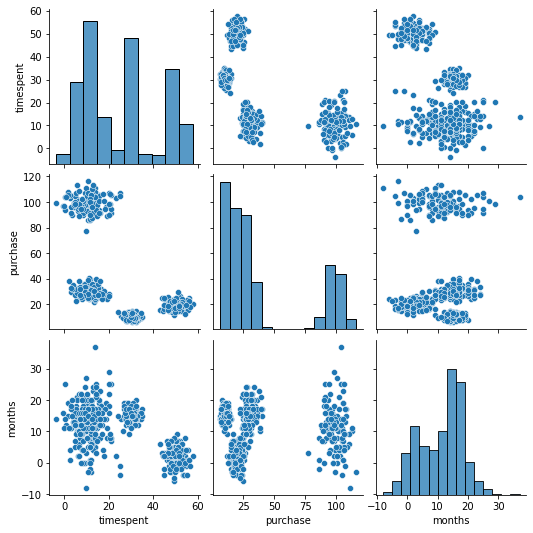

In [4]:
import seaborn as sns

sns.pairplot(data, diag_kind='hist');

It's easy to see that the data is clustered,  
adding the color to the clusters that the K-means found shows that he managed to cluster the data correctly:

   timespent   purchase  months       label
0  40.144722  15.007417   8.560  0 centroid
1  10.903580  29.902449  15.096  1 centroid
2  10.686322  98.902750  10.856  2 centroid

     timespent   purchase  months label
0     9.749627  26.984142    14.0     1
1    30.416766   5.916530    15.0     0
2     8.809746  35.502827    14.0     1
3    31.418008   9.820529    18.0     0
4    48.279014  18.359423     2.0     0
..         ...        ...     ...   ...
495  30.498767  13.154907    15.0     0
496   7.192033  27.348396     9.0     1
497  20.174739  98.147402    29.0     2
498  56.226202  22.613374     1.0     0
499  54.934903  19.252892     4.0     0

[500 rows x 4 columns]


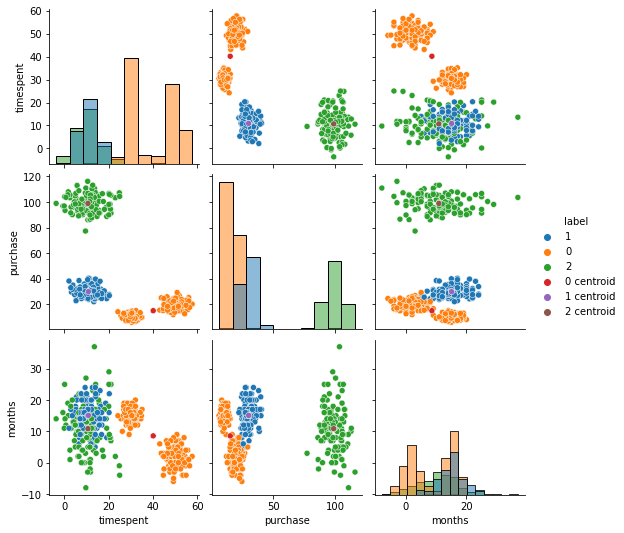

In [5]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
# Add a column with the cluster number
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset will be needed later
data_all = pd.concat([data, centroids], ignore_index=True)

print(centroids)
print()
print(data)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist');

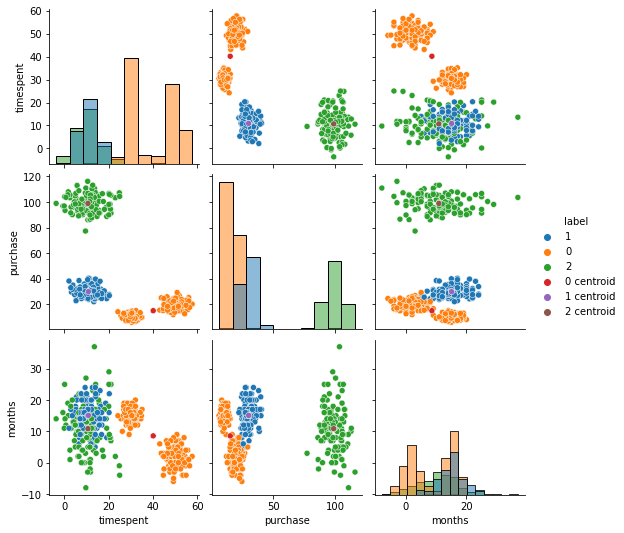

In [6]:
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

__Task:__ Train a model with initial centroids.  
Build a `pairplot` diagram with fill for both the clusters and centroids of the resulting clusters.  
Add the initial centroids as a separate layer without fill.

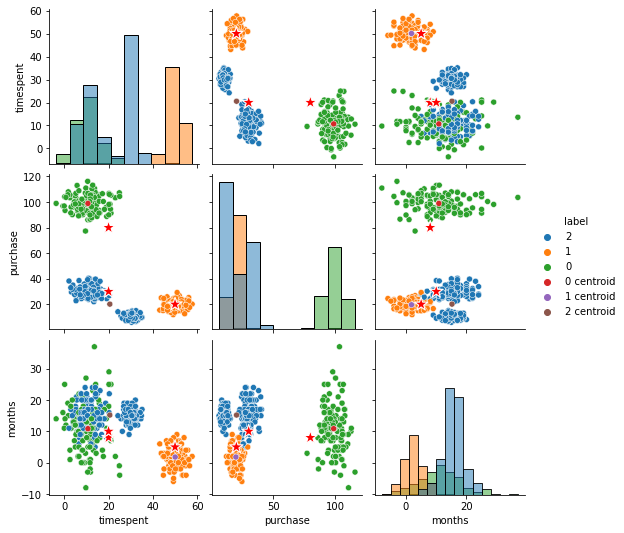

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset is required to create pairgrid.data
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
centroids_init = pd.DataFrame(centers, columns=data.drop(columns=['label']).columns)
centroids_init['label'] = 4
# An additional layer for the centroids
pairgrid.data = centroids_init
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag');

### Optimal Number of Clusters

The objective function of the k-means method decreases as the number of clusters increases.  
If each observation had a cluster, the distance would be 0.  
In the previous example there were 3 features, but in real life there might be hundreds, so using pairplot is not optional in those situations.

__Elbow method__ (its graph resembles an arm bent at the elbow) is used to determine the number of clusters.  
Plot a graph using this method, you'll need to make a list of the target function values of 1 to 10 clusters (less than 20). To do this, let's train the model several times and save the objective function values for each model in the distortion list:  

When the graps turns almost into horizontal line, this is the optimal clustering number.

In [46]:
distortion = []
K = range(2, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)

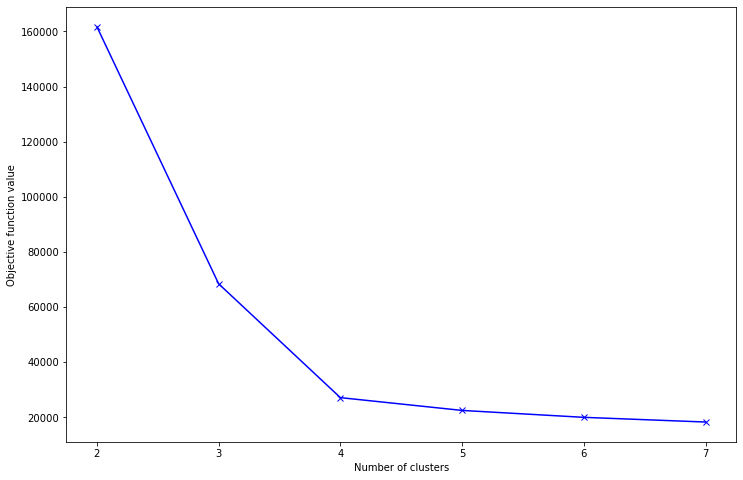

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.show()

__Task:__ Display the objective function values for 1 to 7 clusters. During training, apply the parameter random_state=12345.

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

K = range(2, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    print('Number of clusters:', k) 
    print('Objective function value', model.inertia_)

Number of clusters: 2
Objective function value 161733.64953602102
Number of clusters: 3
Objective function value 68431.50999400369
Number of clusters: 4
Objective function value 27110.790247969937
Number of clusters: 5
Objective function value 22468.766585439174
Number of clusters: 6
Objective function value 19960.565605742842
Number of clusters: 7
Objective function value 18257.632605610906


__Task:__ Train the model for four clusters. Specify the centroids as: `['0 centroid', '1 centroid', '2 centroid', '3 centroid']`. Plot a `pairplot` diagram with the resulting centroids and a fill for the model. Set the `random_state` parameter to 12345.

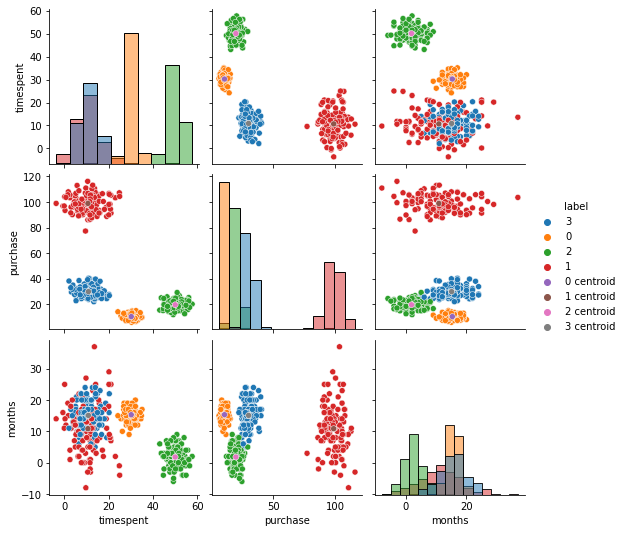

In [50]:
# Training a model for 4 clusters
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
    
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist');

__Task:__ Train two models for three and four clusters, respectively. Display the rounded centroids of the resulting models. Set the random_state parameter to 12345.

In [56]:
# Training a model for 3 clusters
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print('Typical user segments for 3 clusters:')
print(model.cluster_centers_.round())

# Training a model for 4 clusters
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)

print('Typical user segments for 4 clusters:')
print(model.cluster_centers_.round())

Typical user segments for 3 clusters:
[[40. 15.  9.  1.]
 [11. 30. 15.  3.]
 [11. 99. 11.  1.]]
Typical user segments for 4 clusters:
[[30. 10. 15.  0.]
 [11. 99. 11.  1.]
 [50. 20.  2.  2.]
 [11. 30. 15.  3.]]


### Result Interpretation

Comparison between several clustering algorithms (from <a href="https://scikit-learn.org/stable/modules/clustering.html">here</a>):

<div>
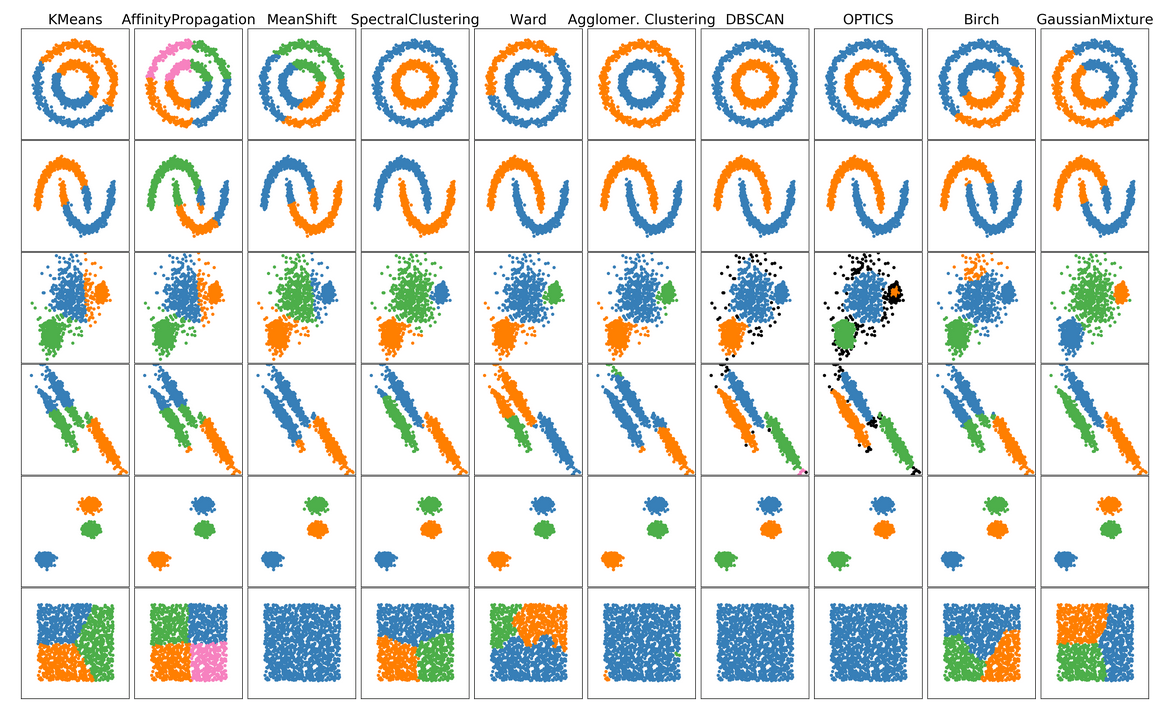
</div>

<div>
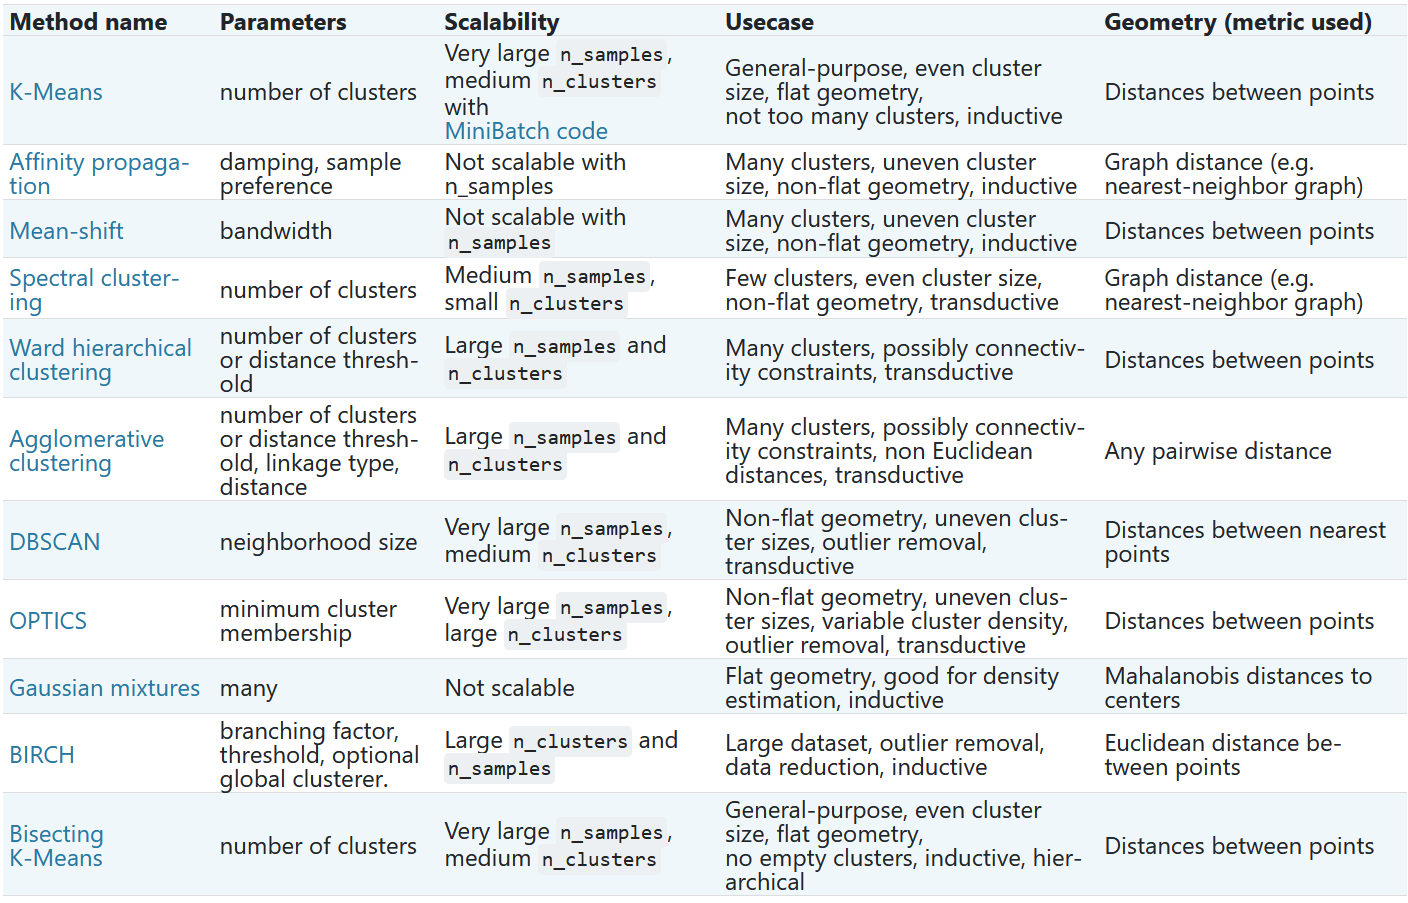
</div>

### Structuring Data

Clustering can also be used in tasks with data labeling.  
It is used to find structure in the data and understand which features are more important.

Data Description  

    mpg — fuel consumption (miles per gallon)
    cylinders — number of cylinders
    cubicinches — engine volume
    hp — engine power (horsepower)
    weightlbs — car weight
    time-to-60 — acceleration time to 60 miles per hour
    year — the year of production
    brand — the country of manufacture
    
To analyze these, train the k-means algorithm __without__ the column with countries of manufacture.

__Task:__ Plot a graph for the number of clusters from 1 to 10, utilizing the elbow method.  
Set the random_state parameter to 12345.

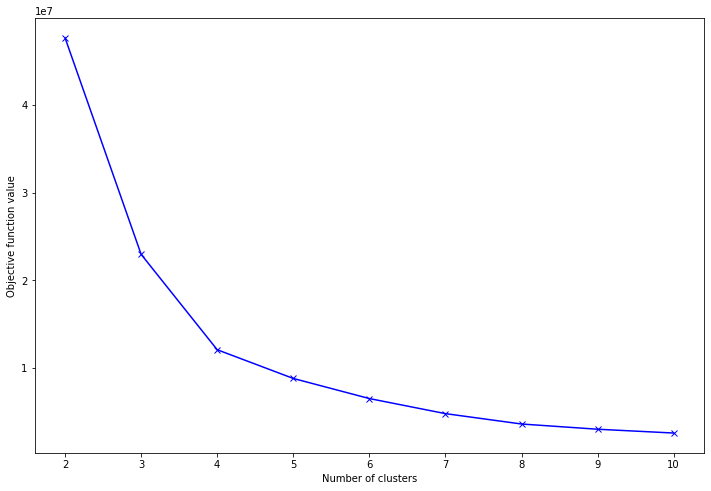

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/cars.csv')
# data_no_brand=data.drop('brand', axis=1)

distortion = []
K = range(2, 11) # range up to 11 return values until 10
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)
    
    
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.show();

__Task:__ Build a `pairplot` graph for a model with three clusters without initial centroids. Set the random_state parameter to 12345.  
Due to some nuances of seaborn versions, you should specify the list of attributes in the pairplot() function:  
`vars=data.columns[:-1]`.  
The last attribute is the cluster number and doesn't need to be displayed.

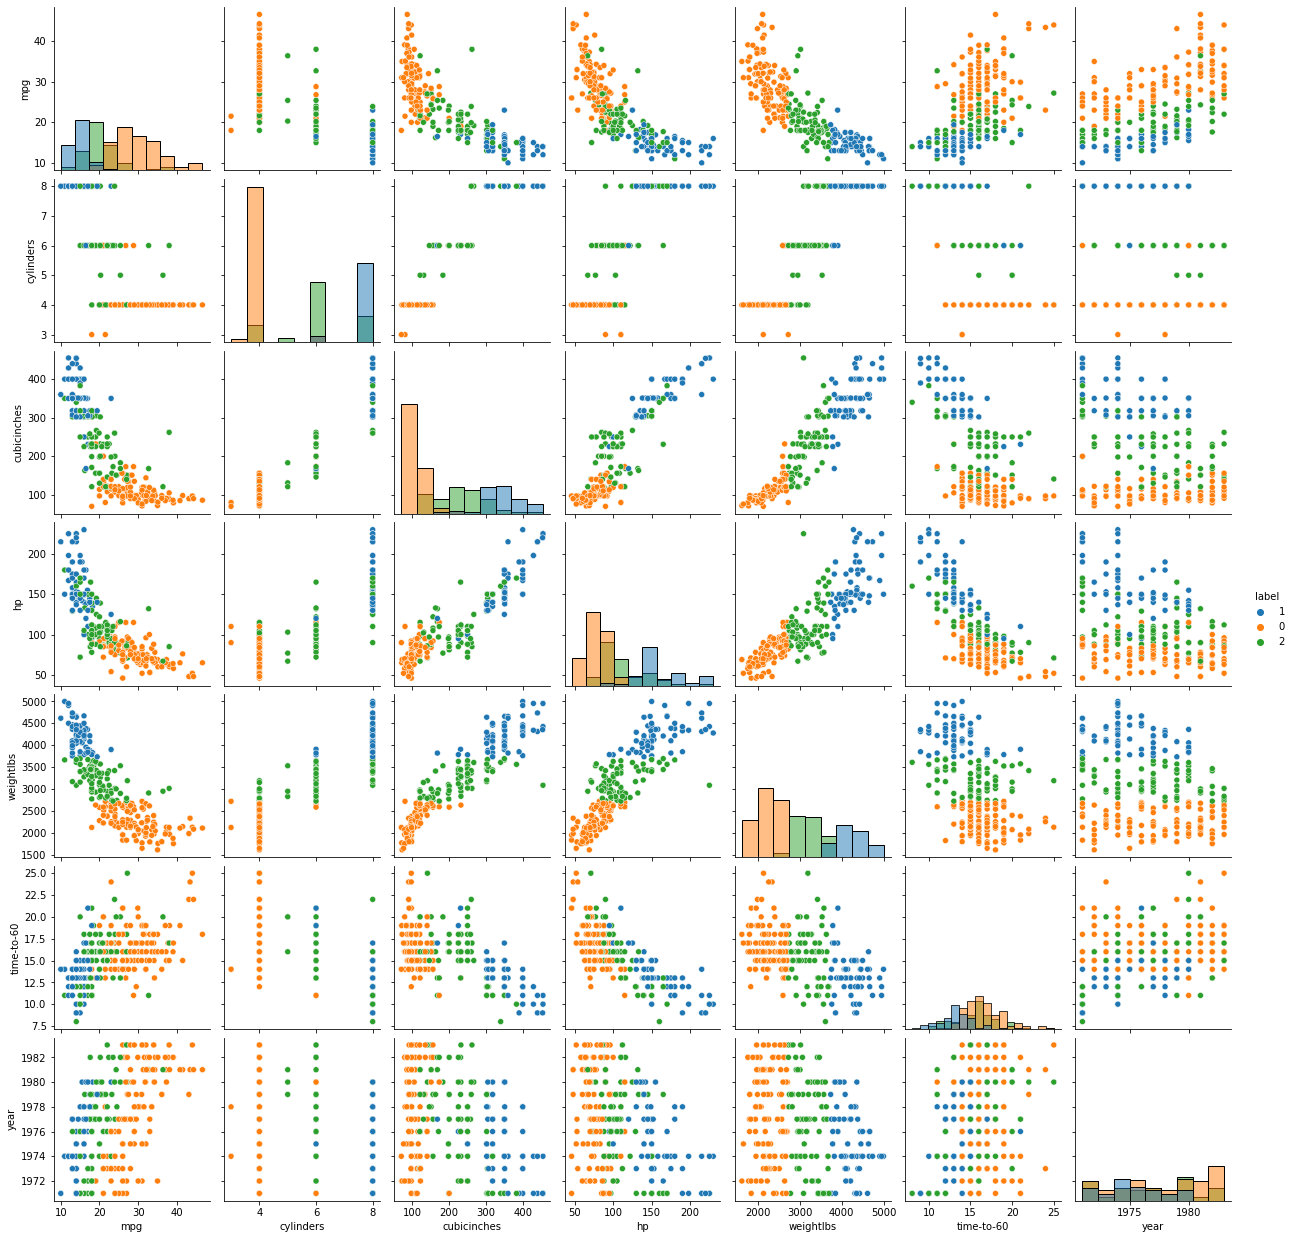

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
# Add a column with the cluster number
data['label'] = model.labels_.astype(str)

# Plot the graph
sns.pairplot(data, hue='label', vars=data.columns[:-1], diag_kind='hist');

We got some insights:

    The numbers of points in the three clusters are now more alike than the values we got distributing cars by countries of manufacture.
    The clusters of observations for the number of cylinders ended up in different clusters: they were affected by other features.
    The time-to-60 and year columns remained useless.

__Task:__ Plot a `pairplot` diagram with a fill in the brand column.  
Train a model with 3 clusters on data without the `brand` column.  
Add the resulting centroids to the graph. Set the `random_state` parameter to 12345.

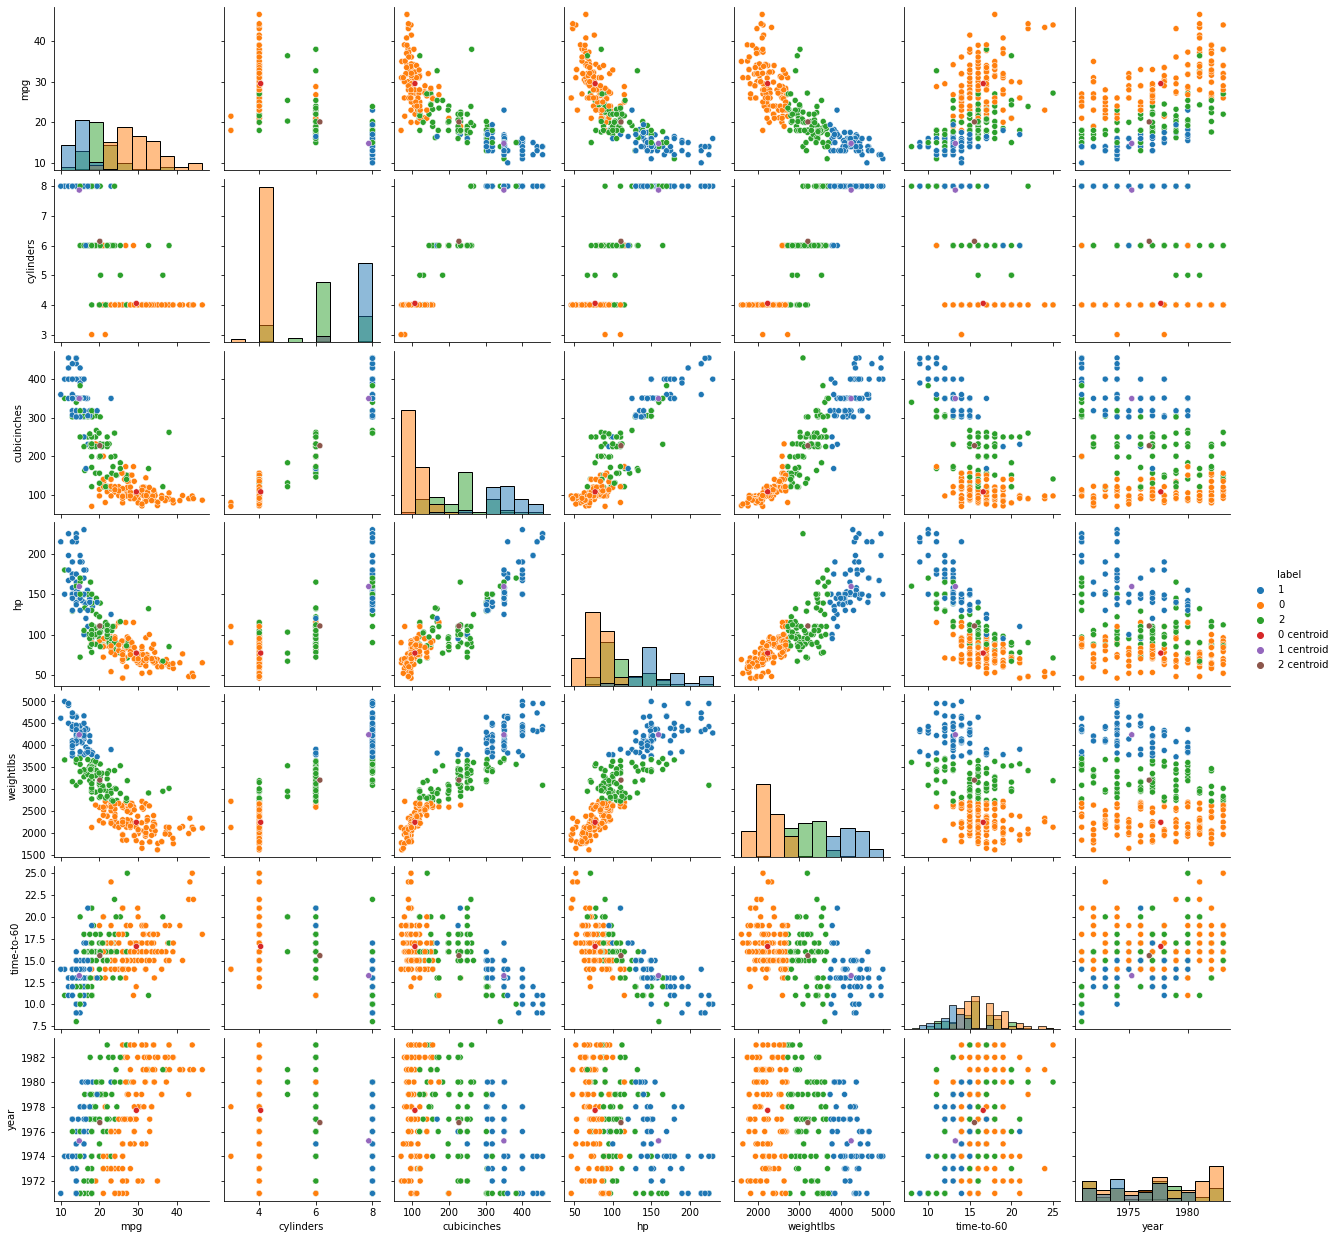

In [23]:
data_full = pd.read_csv('datasets/cars_label.csv')

data = data_full.drop(columns=['brand'])

# Model training
model=KMeans(n_clusters=3, random_state=12345)
model.fit(data)

# Additional layer for centroids
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data_full['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
data_all = pd.concat([data_full, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist');
# Plotting the graph
# < write code here >


## Anomaly Detection

### Boxplot

Detecting outliers by comparing numbers to the median on a boxplot, which is also called a box-and-whisker plot because of the lines that extend from the boxes like whiskers.

<div>
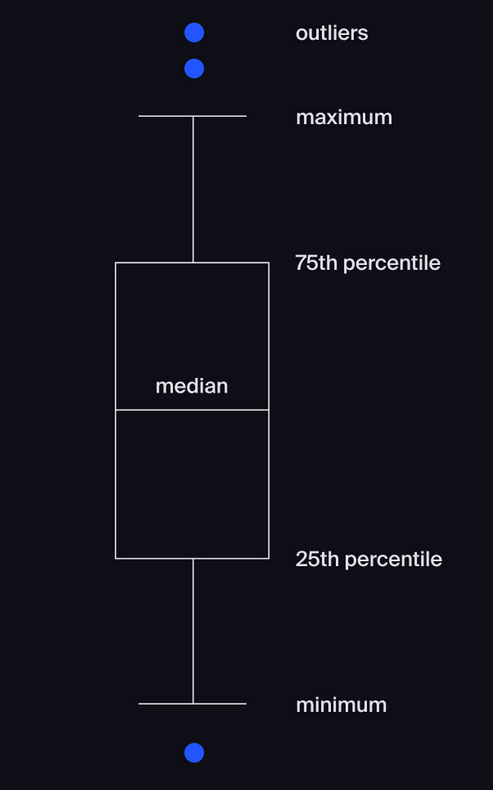
</div>

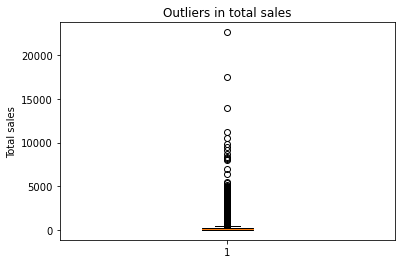

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/sales.csv')

plt.boxplot(df['Sales'].values)
plt.ylabel('Total sales')
plt.title('Outliers in total sales')
plt.show()

The average check for most purchases is $500-$1,000. Purchases ranging from $5,000 to $20,000 are anomalies (indicated by the circles).

Outliers in total sales:  1167


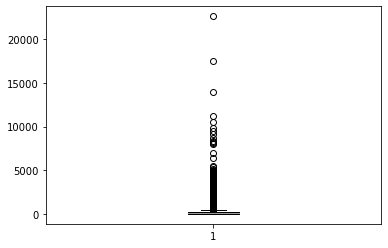

In [26]:
boxplot = plt.boxplot(df['Sales'].values)
outliers = list(boxplot['fliers'][0].get_data()[1])
print('Outliers in total sales: ', len(outliers))

__Task:__ Find anomalies in the dataset in the `'Profit'` feature. Extract the list of anomalies from the boxplot and record the results in the outliers variable.  

Filter the original dataset with the `isin()` function and save the list of anomalies in the df_outliers variable.  

Print the number of anomalies

Number of anomalies:  1881


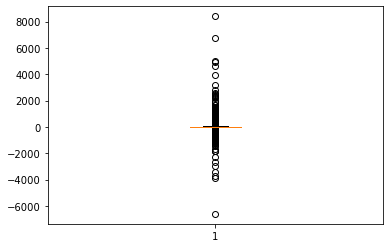

In [32]:
boxplot = plt.boxplot(df['Profit'].values)
outliers = list(boxplot['fliers'][0].get_data()[1])
df_outliers = df[df["Profit"].isin(outliers)]

print('Number of anomalies: ', len(df_outliers))

### Isolation forest

__Isolation forest__ - method that orgenize data into groups based on decision trees, this method relies on the fact that anomalies can be isolated from the rest by a small number of decision rules.  

Creating a "model" for training like in the other ML prediction algorithms:

In [1]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)

To find anomalies in one-dimensional data, convert `df['Sales']` into a two-dimensional array:

In [9]:
sales = df['Sales'].values.reshape(-1, 1)

print('1-D')
df['Sales']

print()
print('2-D')
sales

1-D


0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64


2-D


array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

Isolation forest is not giving accurate result when working on only 1 feature,  
2 features are the minimum for finding anomalies using this method.

In [12]:
data = df[['Sales', 'Profit']]

Training the model like other models:

In [11]:
isolation_forest.fit(data)

IsolationForest()

`decision_function()` returns how the model evaluates the observations. Anomaly estimates vary between -0.5 and 0.5. A lower estimate indicates a higher chance that the observation is an outlier.

In [13]:
anomaly_scores = isolation_forest.decision_function(data)

Calling the `predict()` to classify observations. Normal observation gets the value 1, and an outlier gets -1.

In [14]:
estimator = isolation_forest.predict(data)

___Task:__ Train the isolation forest model and calculate the number of anomalies based on these features:

    Sales: df['Sales']
    Profit: df['Profit']

Determine which observations are outliers and place them in the outliers variable.
Print the size of the list

In [20]:
import pandas as pd
from sklearn.ensemble import IsolationForest

df = pd.read_csv('datasets/sales.csv')
data = df[['Sales', 'Profit']]

isolation_forest = IsolationForest(n_estimators=100, random_state=12345)
estimator = isolation_forest.fit_predict(data)

outliers = df.loc[estimator==-1].values.tolist()
outliers=estimator[estimator==-1].tolist()

print(estimator)
print('Number of anomalies: ', len(outliers))

[ 1 -1  1 ...  1  1  1]
Number of anomalies:  1214


In [4]:
anomaly_scores = isolation_forest.decision_function(data)
outliers = anomaly_scores[anomaly_scores<0]

print('Number of anomalies: ', len(outliers))

Number of anomalies:  1214


In [5]:
outliers = data.loc[estimator==-1]

print('Number of anomalies: ', len(outliers))

Number of anomalies:  1214


### KNN-Based Anomaly Detection Method

The __k-nearest neighbors algorithm (KNN)__ can also be used to find outliers. In this algorithm, each observation is a vector, and the higher the distance it has from it's neighbors, the higher the probability that this is an outlier.

In [14]:
# !pip install pyod
# !pip install scipy

In [15]:
from pyod.models.knn import KNN

model = KNN()
model.fit(data)

predictions = model.predict(data)

The `predict()` returns 0 for good observation, and 1 for an outlier/anomaly.

In [16]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [18]:
len(predictions[predictions==1])

884

__Task:__ Use the KNN model and the isolation forest to find the outliers in the data with the `'Sales'` and `'Profit'` variables. Find out how many anomalies matched.  
Print the two variants of the number of outliers and the number of matching anomalies on the screen. The output format is specified in the precode.

In [54]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

df = pd.read_csv('datasets/sales.csv')
data = df[['Sales', 'Profit']]

model = KNN()
estimation_knn = model.fit_predict(data) == 1
outliers_knn = estimation_knn.sum()
print('Number of anomalies (KNN): ', outliers_knn)

model = IsolationForest(n_estimators=100)
estimation_iforest = model.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

# df_matched=(
#     data.loc[estimation_knn==1].reset_index()
# ).merge(
#     data.loc[estimator==-1].reset_index(), on=['index','Sales','Profit'], how='inner'
# )

# print('Matched: ', len(df_matched))
print("Matched: ", (estimation_knn & estimation_iforest).sum()) 

C:\Users\eliram\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Number of anomalies (KNN):  1000
Number of anomalies (isolation forest):  1054
Matched:  889


In [55]:
(data.loc[estimation_knn==1].reset_index()).merge(data.loc[estimator==-1].reset_index(), on=['index','Sales','Profit'], how='inner')

,index,Sales,Profit
0,1,731.9400,219.5820
1,3,957.5775,-383.0310
2,10,1706.1840,85.3092
3,11,911.4240,68.3568
4,14,68.8100,-123.8580
...,...,...,...
936,9931,683.3320,-40.1960
937,9942,998.8200,29.9646
938,9947,1925.8800,539.2464
939,9948,2405.2000,793.7160
